In [43]:
import pandas as pd
import numpy as np

In [282]:
df = pd.read_csv("events2.csv")
df

,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Solar power generation forecast - updated hourly
0,2019-04-30 21:00:00,2019-04-30 22:00:00,2019-05-01 00:00:00,2019-05-01 01:00:00,0.000
1,2019-04-30 22:00:00,2019-04-30 23:00:00,2019-05-01 01:00:00,2019-05-01 02:00:00,0.000
2,2019-04-30 23:00:00,2019-05-01 00:00:00,2019-05-01 02:00:00,2019-05-01 03:00:00,0.000
3,2019-05-01 00:00:00,2019-05-01 01:00:00,2019-05-01 03:00:00,2019-05-01 04:00:00,0.000
4,2019-05-01 01:00:00,2019-05-01 02:00:00,2019-05-01 04:00:00,2019-05-01 05:00:00,0.004
...,...,...,...,...,...
35059,2023-04-30 16:00:00,2023-04-30 17:00:00,2023-04-30 19:00:00,2023-04-30 20:00:00,85.000
35060,2023-04-30 17:00:00,2023-04-30 18:00:00,2023-04-30 20:00:00,2023-04-30 21:00:00,22.900
35061,2023-04-30 18:00:00,2023-04-30 19:00:00,2023-04-30 21:00:00,2023-04-30 22:00:00,0.000
35062,2023-04-30 19:00:00,2023-04-30 20:00:00,2023-04-30 22:00:00,2023-04-30 23:00:00,0.000


In [283]:
df['Solar power generation forecast - updated hourly'].value_counts()

0.000     15128
0.100        89
0.001        48
0.002        47
0.200        45
          ...  
98.934        1
83.253        1
82.245        1
74.941        1
22.900        1
Name: Solar power generation forecast - updated hourly, Length: 14903, dtype: int64

In [284]:
df2 = df[['Start time UTC+03:00','Solar power generation forecast - updated hourly']]
df2.columns = ("time","Energy")

In [285]:
df2['time'] = pd.to_datetime(df2['time'])

C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
df2.set_index('time', inplace= True)
df2 = df2.resample('D').mean()

In [287]:
df2

,Energy
time,
2019-05-01,22.060042
2019-05-02,13.301750
2019-05-03,18.712167
2019-05-04,20.363875
2019-05-05,33.580750
...,...
2023-04-26,116.112500
2023-04-27,100.262500
2023-04-28,145.733333


In [288]:
from kats.consts import TimeSeriesData
df2['time'] = df2.index
data = TimeSeriesData(df2)

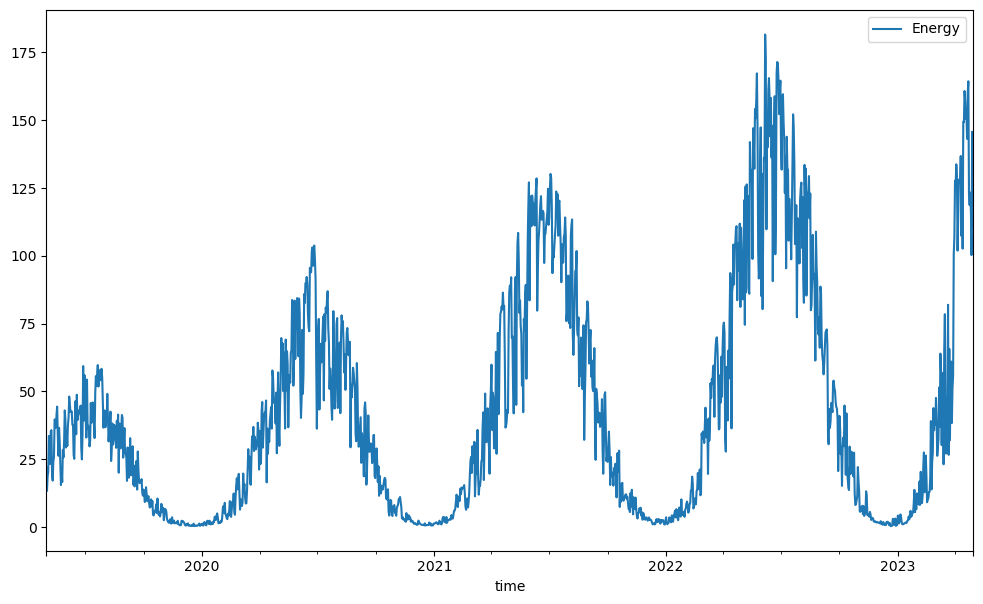

In [289]:
import matplotlib.pyplot as plt
data.plot(cols=['Energy'])
plt.show()

In [290]:
from kats.detectors.outlier import OutlierDetector
data_outliers = OutlierDetector(data, 'additive')
data_outliers.detector()
data_outliers.outliers

[[Timestamp('2020-06-30 00:00:00'),
  Timestamp('2020-07-11 00:00:00'),
  Timestamp('2020-07-26 00:00:00'),
  Timestamp('2020-08-22 00:00:00'),
  Timestamp('2021-05-06 00:00:00'),
  Timestamp('2021-05-10 00:00:00'),
  Timestamp('2021-05-21 00:00:00'),
  Timestamp('2021-05-26 00:00:00'),
  Timestamp('2021-05-31 00:00:00'),
  Timestamp('2021-06-12 00:00:00'),
  Timestamp('2021-08-05 00:00:00'),
  Timestamp('2021-08-06 00:00:00'),
  Timestamp('2021-08-08 00:00:00'),
  Timestamp('2021-08-25 00:00:00'),
  Timestamp('2021-09-12 00:00:00'),
  Timestamp('2022-04-04 00:00:00'),
  Timestamp('2022-04-05 00:00:00'),
  Timestamp('2022-04-14 00:00:00'),
  Timestamp('2022-05-05 00:00:00'),
  Timestamp('2022-05-07 00:00:00'),
  Timestamp('2022-05-11 00:00:00'),
  Timestamp('2022-05-12 00:00:00'),
  Timestamp('2022-05-13 00:00:00'),
  Timestamp('2022-05-17 00:00:00'),
  Timestamp('2022-05-24 00:00:00'),
  Timestamp('2022-05-26 00:00:00'),
  Timestamp('2022-05-27 00:00:00'),
  Timestamp('2022-05-30 00:0

In [291]:
data = data_outliers.remover(interpolate = True)
data

,time,y_0
0,2019-05-01,22.060042
1,2019-05-02,13.301750
2,2019-05-03,18.712167
3,2019-05-04,20.363875
4,2019-05-05,33.580750
...,...,...
1456,2023-04-26,116.112500
1457,2023-04-27,114.652083
1458,2023-04-28,113.191667
1459,2023-04-29,111.731250


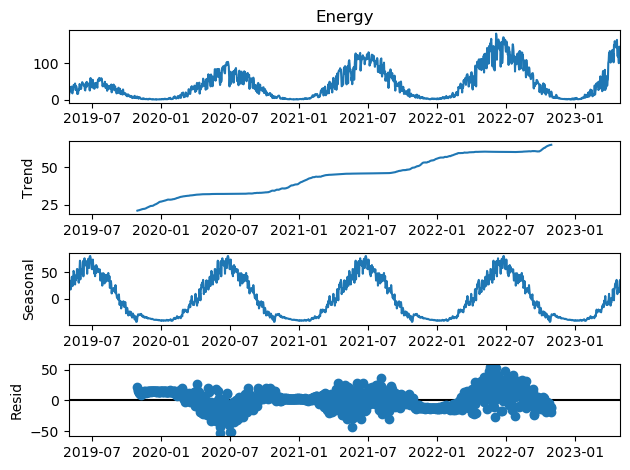

In [292]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(16,9))

analysis = df2['Energy']
decompose_result_mult = seasonal_decompose(analysis, model="additive", period=len(analysis)//4)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

In [293]:
data[:1096]
data[1096:]

,time,y_0
0,2022-05-01,100.866667
1,2022-05-02,83.933333
2,2022-05-03,96.820833
3,2022-05-04,120.479167
4,2022-05-05,122.995833
...,...,...
360,2023-04-26,116.112500
361,2023-04-27,114.652083
362,2023-04-28,113.191667
363,2023-04-29,111.731250


In [294]:
X_train = data[:1096]
X_test = data[1096:]

<Figure size 1600x900 with 0 Axes>

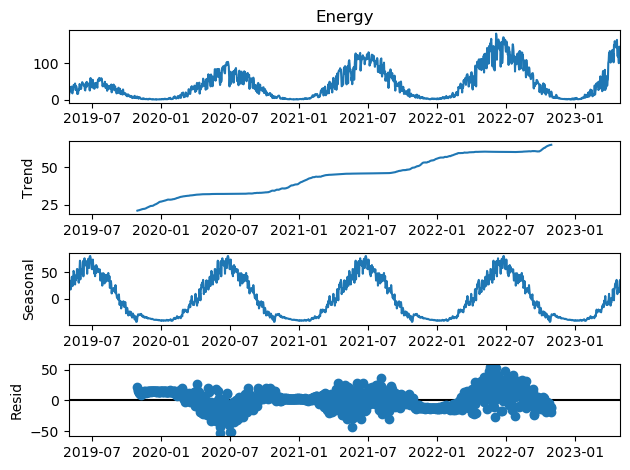

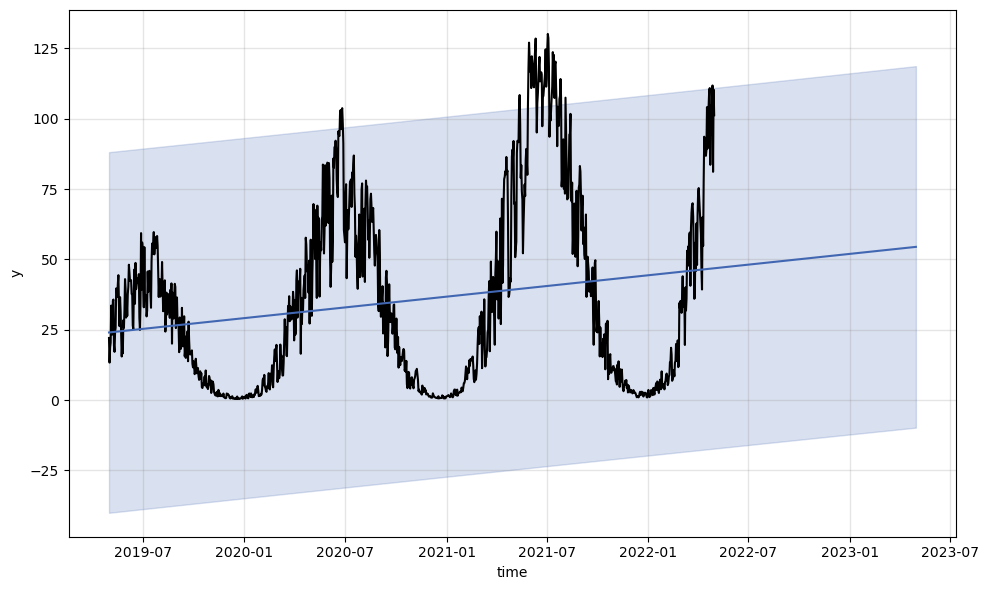

In [295]:
from kats.models.linear_model import LinearModel, LinearModelParams
params = LinearModelParams()
m = LinearModel(X_train, params)
m.fit()
fcst = m.predict(steps=365, freq="D",include_history=True) 
m.plot()
plt.show()

In [296]:
forecast = fcst.loc[fcst['time']>='2022-05-01']
forecast = forecast.reset_index()
testing = X_test.to_dataframe()

In [297]:
final = forecast[['time',"fcst"]].copy()
final['real']=testing['y_0']
final

,time,fcst,real
0,2022-05-01,46.867699,100.866667
1,2022-05-02,46.888544,83.933333
2,2022-05-03,46.909390,96.820833
3,2022-05-04,46.930235,120.479167
4,2022-05-05,46.951081,122.995833
...,...,...,...
360,2023-04-26,54.372056,116.112500
361,2023-04-27,54.392902,114.652083
362,2023-04-28,54.413747,113.191667
363,2023-04-29,54.434593,111.731250


In [298]:
mape_linear = ((final['real']-final['fcst']).abs()/final['real']).mean()
mape_linear

8.10789372842404

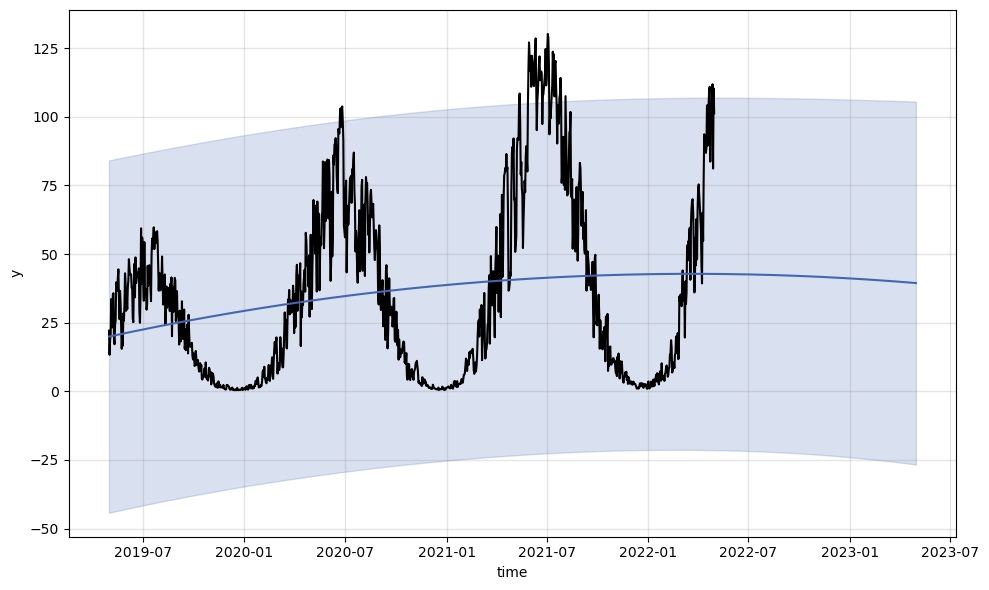

In [299]:
from kats.models.quadratic_model import QuadraticModel, QuadraticModelParams
params = QuadraticModelParams()
m = QuadraticModel(X_train, params)
m.fit()
fcst = m.predict(steps=365, freq="D",include_history=True) 
m.plot()
plt.show()

In [300]:
forecast = fcst.loc[fcst['time']>='2022-05-01']
forecast = forecast.reset_index()
final = forecast[['time',"fcst"]].copy()
final['real']=testing['y_0']
final

,time,fcst,real
0,2022-05-01,42.747217,100.866667
1,2022-05-02,42.745525,83.933333
2,2022-05-03,42.743793,96.820833
3,2022-05-04,42.742019,120.479167
4,2022-05-05,42.740205,122.995833
...,...,...,...
360,2023-04-26,39.485624,116.112500
361,2023-04-27,39.469154,114.652083
362,2023-04-28,39.452644,113.191667
363,2023-04-29,39.436092,111.731250


In [301]:
mape_quadratic = ((final['real']-final['fcst']).abs()/final['real']).mean()
mape_quadratic

6.464086912619122

C:\ProgramData\anaconda3\lib\site-packages\kats\models\holtwinters.py:134: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead



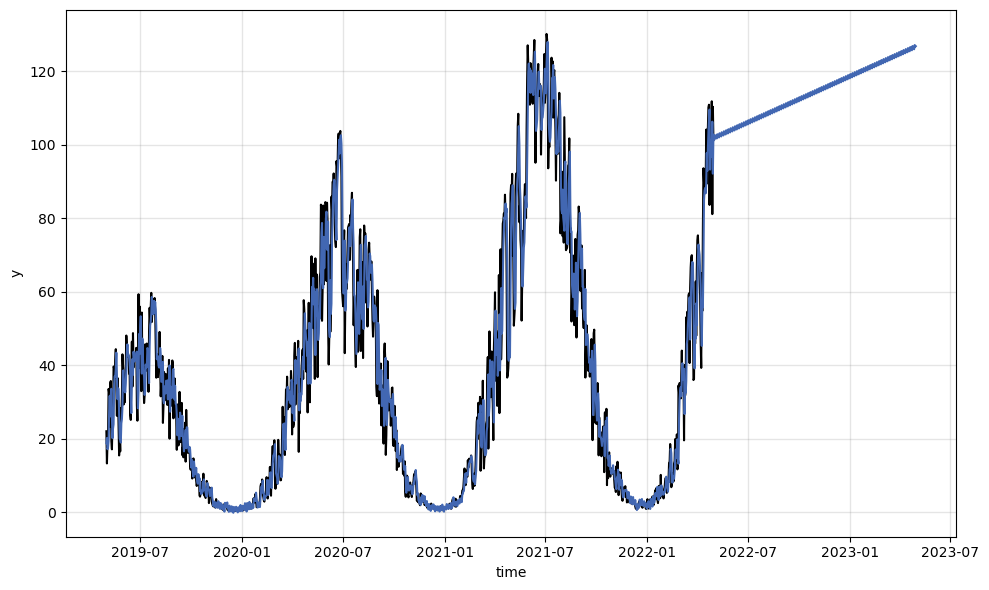

In [311]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
params = HoltWintersParams(trend="add",seasonal="add", seasonal_periods=4,)
m = HoltWintersModel(data=X_train,params=params)
m.fit()
fcst = m.predict(steps=365, freq="D",include_history=True) 
m.plot()
plt.show()

In [312]:
forecast = fcst.loc[fcst['time']>='2022-05-01']
forecast = forecast.reset_index()
final = forecast[['time',"fcst"]].copy()
final['real']=testing['y_0']
final

,time,fcst,real
0,2022-05-01,102.023812,100.866667
1,2022-05-02,101.455049,83.933333
2,2022-05-03,102.607670,96.820833
3,2022-05-04,102.127565,120.479167
4,2022-05-05,102.296576,122.995833
...,...,...,...
360,2023-04-26,126.572493,116.112500
361,2023-04-27,126.003729,114.652083
362,2023-04-28,127.156351,113.191667
363,2023-04-29,126.676245,111.731250


In [313]:
mape_hwinters = ((final['real']-final['fcst']).abs()/final['real']).mean()
mape_hwinters

18.650715031280583

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


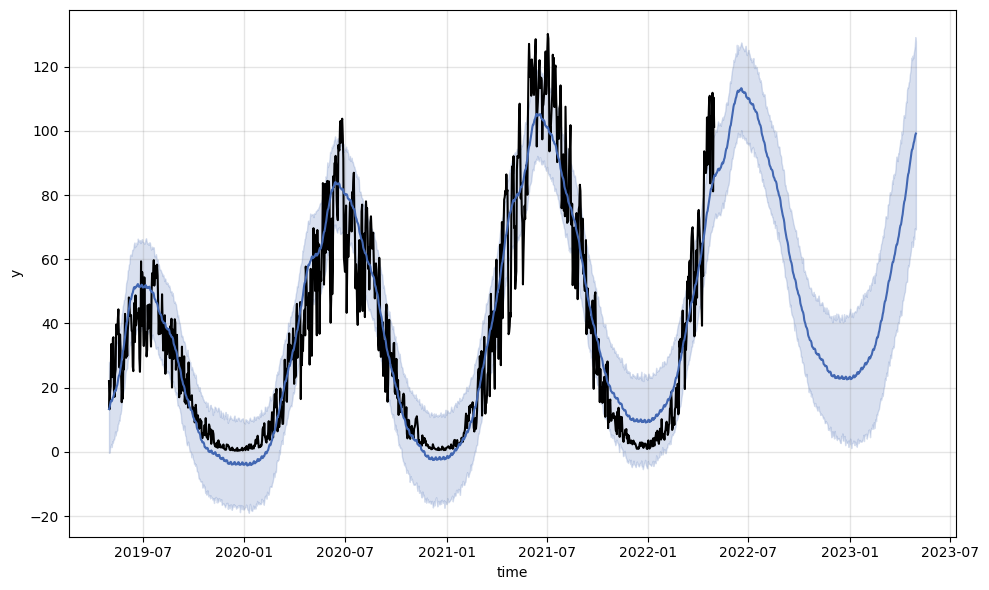

In [314]:
from kats.models.prophet import ProphetModel, ProphetParams
params = ProphetParams(seasonality_mode='additive')
m = ProphetModel(X_train, params)
m.fit()
fcst = m.predict(steps=365, freq="D",include_history=True) 
m.plot()
plt.show()

In [315]:
forecast = fcst.loc[fcst['time']>='2022-05-01']
forecast = forecast.reset_index()
final = forecast[['time',"fcst"]].copy()
final['real']=testing['y_0']
final

,time,fcst,real
0,2022-05-01,86.290719,100.866667
1,2022-05-02,85.945131,83.933333
2,2022-05-03,86.318276,96.820833
3,2022-05-04,86.834070,120.479167
4,2022-05-05,86.946234,122.995833
...,...,...,...
360,2023-04-26,96.229380,116.112500
361,2023-04-27,96.795707,114.652083
362,2023-04-28,97.820628,113.191667
363,2023-04-29,98.711099,111.731250


In [316]:
mape_prophet = ((final['real']-final['fcst']).abs()/final['real']).mean()
mape_prophet

3.6223938356324235

C:\ProgramData\anaconda3\lib\site-packages\kats\models\theta.py:130: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



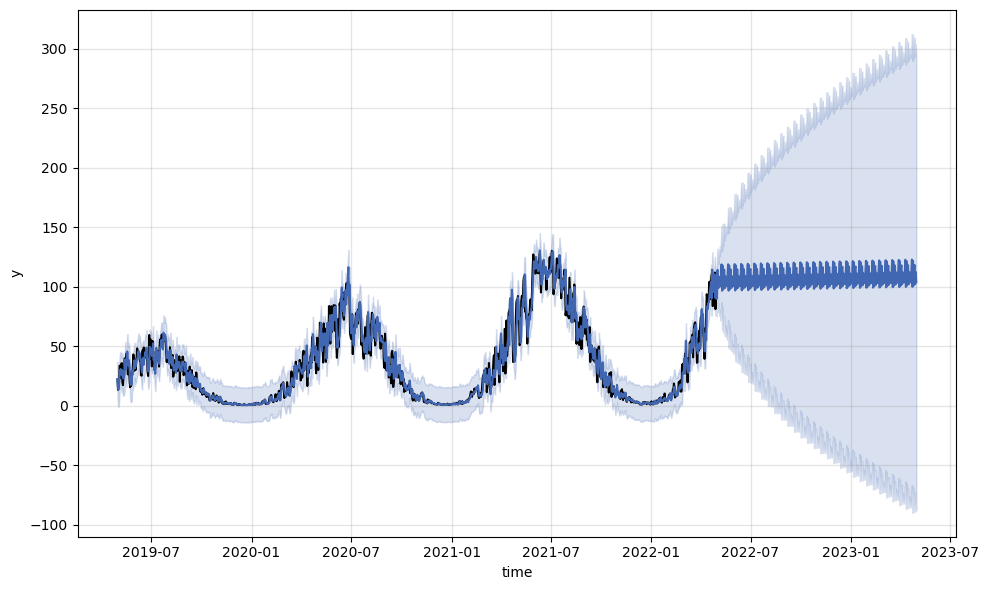

In [317]:
from kats.models.theta import ThetaModel, ThetaParams
params = ThetaParams(m=12)
m = ThetaModel(data=X_train, params=params)
m.fit()
fcst = m.predict(steps=365, freq="D",include_history=True) 
m.plot()
plt.show()

In [318]:
forecast = fcst.loc[fcst['time']>='2022-05-01']
forecast = forecast.reset_index()
final = forecast[['time',"fcst"]].copy()
final['real']=testing['y_0']
final

,time,fcst,real
0,2022-05-01,112.657348,100.866667
1,2022-05-02,114.107679,83.933333
2,2022-05-03,98.621548,96.820833
3,2022-05-04,108.497880,120.479167
4,2022-05-05,100.281079,122.995833
...,...,...,...
360,2023-04-26,116.642554,116.112500
361,2023-04-27,118.143794,114.652083
362,2023-04-28,102.109558,113.191667
363,2023-04-29,112.334815,111.731250


In [319]:
mape_theta = ((final['real']-final['fcst']).abs()/final['real']).mean()
mape_theta

17.244372698062154